In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Data preparation
## Normalizing data gives better performance in DL

In [51]:
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [52]:
Data

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]],
 [[0.1], [0.11], [0.12], [0.13], [0.14]],
 [[0.11], [0.12], [0.13], [0.14], [0.15]],
 [[0.12], [0.13], [0.14], [0.15], [0.16]],
 [[0.13], [0.14], [0.15], [0.16], [0.17]],
 [[0.14], [0.15], [0.16], [0.17], [0.18]],
 [[0.15], [0.16], [0.17], [0.18], [0.19]],
 [[0.16], [0.17], [0.18], [0.19], [0.2]],
 [[0.17], [0.18], [0.19], [0.2], [0.21]],
 [[0.18], [0.19], [0.2], [0.21], [0.22]],
 [[0.19], [0.2], [0.21], [0.22], [0.23]],
 [[0.2], [0.21], [0.22], [0.23], [0.24]],
 [[0.21], [0.22], [0.23], [0.24], [0.25]],
 [[0.22], [0.23], [0.24], [0.25], [0.26]],
 [[0.23], [0.24], [0.2

In [53]:
target

[0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04]

In [54]:
data = np.array(Data, dtype=float)
target = np.array(target, dtype=float)
print(f"Data shape: {data.shape}, Target shape: {target.shape}")

Data shape: (100, 5, 1), Target shape: (100,)


In [55]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [56]:
print("{}, {}, {}, {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

(80, 5, 1), (20, 5, 1), (80,), (20,)


# LSTM model

In [57]:
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None, 5, 1), return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [58]:
# Setting return_sequences=True retains output shape as (None, 5 ,1)
# where the columns of input was also 5
# model.summary()

In [59]:
# Setting return_sequences=False returns just column 1 (based on LSTM(1), output only 1 value)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
3/3 [==============================] - 1s 220ms/step - loss: 0.7369 - accuracy: 0.0000e+00 - val_loss: 0.6537 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.7332 - accuracy: 0.0000e+00 - val_loss: 0.6502 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.7296 - accuracy: 0.0000e+00 - val_loss: 0.6467 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.7260 - accuracy: 0.0000e+00 - val_loss: 0.6433 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.7224 - accuracy: 0.0000e+00 - val_loss: 0.6398 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.7189 - accuracy: 0.0000e+00 - val_loss: 0.6364 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.7154 - accuracy: 0.0000e+00 - va

3/3 [==============================] - 0s 10ms/step - loss: 0.5789 - accuracy: 0.0000e+00 - val_loss: 0.5051 - val_accuracy: 0.0000e+00
Epoch 56/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5766 - accuracy: 0.0000e+00 - val_loss: 0.5029 - val_accuracy: 0.0000e+00
Epoch 57/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5744 - accuracy: 0.0000e+00 - val_loss: 0.5008 - val_accuracy: 0.0000e+00
Epoch 58/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5722 - accuracy: 0.0000e+00 - val_loss: 0.4987 - val_accuracy: 0.0000e+00
Epoch 59/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5700 - accuracy: 0.0000e+00 - val_loss: 0.4967 - val_accuracy: 0.0000e+00
Epoch 60/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5677 - accuracy: 0.0000e+00 - val_loss: 0.4947 - val_accuracy: 0.0000e+00
Epoch 61/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.5656 - accuracy: 0.0000e+00 - val_loss

Epoch 110/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4458 - accuracy: 0.0000e+00 - val_loss: 0.3844 - val_accuracy: 0.0000e+00
Epoch 111/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4424 - accuracy: 0.0000e+00 - val_loss: 0.3815 - val_accuracy: 0.0000e+00
Epoch 112/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4389 - accuracy: 0.0000e+00 - val_loss: 0.3785 - val_accuracy: 0.0000e+00
Epoch 113/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4354 - accuracy: 0.0000e+00 - val_loss: 0.3754 - val_accuracy: 0.0000e+00
Epoch 114/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4319 - accuracy: 0.0000e+00 - val_loss: 0.3722 - val_accuracy: 0.0000e+00
Epoch 115/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4281 - accuracy: 0.0000e+00 - val_loss: 0.3690 - val_accuracy: 0.0000e+00
Epoch 116/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4244 - accuracy: 

3/3 [==============================] - 0s 10ms/step - loss: 0.2141 - accuracy: 0.0125 - val_loss: 0.2111 - val_accuracy: 0.0000e+00
Epoch 165/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.2121 - accuracy: 0.0125 - val_loss: 0.2107 - val_accuracy: 0.0000e+00
Epoch 166/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.2100 - accuracy: 0.0125 - val_loss: 0.2104 - val_accuracy: 0.0000e+00
Epoch 167/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.2084 - accuracy: 0.0125 - val_loss: 0.2100 - val_accuracy: 0.0000e+00
Epoch 168/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.2068 - accuracy: 0.0125 - val_loss: 0.2096 - val_accuracy: 0.0000e+00
Epoch 169/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.2055 - accuracy: 0.0125 - val_loss: 0.2091 - val_accuracy: 0.0000e+00
Epoch 170/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.2042 - accuracy: 0.0125 - val_loss: 0.2087 - val_accuracy: 

Epoch 220/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1770 - accuracy: 0.0125 - val_loss: 0.1893 - val_accuracy: 0.0000e+00
Epoch 221/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1766 - accuracy: 0.0125 - val_loss: 0.1888 - val_accuracy: 0.0000e+00
Epoch 222/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1762 - accuracy: 0.0125 - val_loss: 0.1885 - val_accuracy: 0.0000e+00
Epoch 223/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1758 - accuracy: 0.0125 - val_loss: 0.1881 - val_accuracy: 0.0000e+00
Epoch 224/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1755 - accuracy: 0.0125 - val_loss: 0.1878 - val_accuracy: 0.0000e+00
Epoch 225/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1751 - accuracy: 0.0125 - val_loss: 0.1874 - val_accuracy: 0.0000e+00
Epoch 226/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1747 - accuracy: 0.0125 - val_loss: 0.187

Epoch 276/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1563 - accuracy: 0.0125 - val_loss: 0.1660 - val_accuracy: 0.0000e+00
Epoch 277/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1558 - accuracy: 0.0125 - val_loss: 0.1656 - val_accuracy: 0.0000e+00
Epoch 278/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1555 - accuracy: 0.0125 - val_loss: 0.1650 - val_accuracy: 0.0000e+00
Epoch 279/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1551 - accuracy: 0.0125 - val_loss: 0.1645 - val_accuracy: 0.0000e+00
Epoch 280/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.1547 - accuracy: 0.0125 - val_loss: 0.1640 - val_accuracy: 0.0000e+00
Epoch 281/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1544 - accuracy: 0.0125 - val_loss: 0.1635 - val_accuracy: 0.0000e+00
Epoch 282/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1540 - accuracy: 0.0125 - val_loss: 0.1630

Epoch 332/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1335 - accuracy: 0.0125 - val_loss: 0.1390 - val_accuracy: 0.0000e+00
Epoch 333/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1330 - accuracy: 0.0125 - val_loss: 0.1385 - val_accuracy: 0.0000e+00
Epoch 334/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.1325 - accuracy: 0.0125 - val_loss: 0.1380 - val_accuracy: 0.0000e+00
Epoch 335/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1321 - accuracy: 0.0125 - val_loss: 0.1376 - val_accuracy: 0.0000e+00
Epoch 336/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.1316 - accuracy: 0.0125 - val_loss: 0.1372 - val_accuracy: 0.0000e+00
Epoch 337/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1312 - accuracy: 0.0125 - val_loss: 0.1367 - val_accuracy: 0.0000e+00
Epoch 338/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1307 - accuracy: 0.0125 - val_loss: 0.1363 

3/3 [==============================] - 0s 10ms/step - loss: 0.1050 - accuracy: 0.0125 - val_loss: 0.1052 - val_accuracy: 0.0000e+00
Epoch 388/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1044 - accuracy: 0.0125 - val_loss: 0.1045 - val_accuracy: 0.0000e+00
Epoch 389/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.1038 - accuracy: 0.0125 - val_loss: 0.1039 - val_accuracy: 0.0000e+00
Epoch 390/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.1032 - accuracy: 0.0125 - val_loss: 0.1032 - val_accuracy: 0.0000e+00
Epoch 391/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.1026 - accuracy: 0.0125 - val_loss: 0.1025 - val_accuracy: 0.0000e+00
Epoch 392/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.1020 - accuracy: 0.0125 - val_loss: 0.1018 - val_accuracy: 0.0000e+00
Epoch 393/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.1014 - accuracy: 0.0125 - val_loss: 0.1011 - val_accuracy: 0

Epoch 443/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0664 - accuracy: 0.0125 - val_loss: 0.0623 - val_accuracy: 0.0000e+00
Epoch 444/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.0125 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 445/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0649 - accuracy: 0.0125 - val_loss: 0.0604 - val_accuracy: 0.0000e+00
Epoch 446/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0640 - accuracy: 0.0125 - val_loss: 0.0596 - val_accuracy: 0.0000e+00
Epoch 447/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0632 - accuracy: 0.0125 - val_loss: 0.0586 - val_accuracy: 0.0000e+00
Epoch 448/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0624 - accuracy: 0.0125 - val_loss: 0.0577 - val_accuracy: 0.0000e+00
Epoch 449/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0616 - accuracy: 0.0125 - val_loss: 0.056

Epoch 499/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0318 - accuracy: 0.0125 - val_loss: 0.0237 - val_accuracy: 0.0000e+00
Epoch 500/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0317 - accuracy: 0.0125 - val_loss: 0.0238 - val_accuracy: 0.0000e+00
Epoch 501/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0316 - accuracy: 0.0125 - val_loss: 0.0239 - val_accuracy: 0.0000e+00
Epoch 502/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0316 - accuracy: 0.0125 - val_loss: 0.0238 - val_accuracy: 0.0000e+00
Epoch 503/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0316 - accuracy: 0.0125 - val_loss: 0.0237 - val_accuracy: 0.0000e+00
Epoch 504/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0315 - accuracy: 0.0125 - val_loss: 0.0234 - val_accuracy: 0.0000e+00
Epoch 505/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.0125 - val_loss: 0.0232 

Epoch 555/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.0125 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 556/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.0125 - val_loss: 0.0214 - val_accuracy: 0.0000e+00
Epoch 557/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.0125 - val_loss: 0.0214 - val_accuracy: 0.0000e+00
Epoch 558/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.0125 - val_loss: 0.0212 - val_accuracy: 0.0000e+00
Epoch 559/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.0125 - val_loss: 0.0211 - val_accuracy: 0.0000e+00
Epoch 560/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.0125 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 561/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.0125 - val_loss: 0.021

Epoch 611/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 612/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 613/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 614/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 615/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0212 - val_accuracy: 0.0000e+00
Epoch 616/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 617/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.021

3/3 [==============================] - 0s 10ms/step - loss: 0.0301 - accuracy: 0.0125 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 667/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0301 - accuracy: 0.0125 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 668/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 0.0125 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 669/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 0.0125 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 670/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 0.0125 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 671/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0299 - accuracy: 0.0125 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 672/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0300 - accuracy: 0.0125 - val_loss: 0.0204 - val_accurac

Epoch 722/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 723/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0205 - val_accuracy: 0.0000e+00
Epoch 724/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 725/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 726/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 727/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 728/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.020

3/3 [==============================] - 0s 10ms/step - loss: 0.0294 - accuracy: 0.0125 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 778/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0295 - accuracy: 0.0125 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 779/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0294 - accuracy: 0.0125 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 780/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0294 - accuracy: 0.0125 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 781/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0294 - accuracy: 0.0125 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 782/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0295 - accuracy: 0.0125 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 783/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0295 - accuracy: 0.0125 - val_loss: 0.0203 - val_accurac

Epoch 833/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0293 - accuracy: 0.0125 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 834/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0292 - accuracy: 0.0125 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 835/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0292 - accuracy: 0.0125 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 836/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0292 - accuracy: 0.0125 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 837/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0292 - accuracy: 0.0125 - val_loss: 0.0195 - val_accuracy: 0.0000e+00
Epoch 838/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0292 - accuracy: 0.0125 - val_loss: 0.0195 - val_accuracy: 0.0000e+00
Epoch 839/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0293 - accuracy: 0.0125 - val_loss: 0.019

Epoch 889/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0291 - accuracy: 0.0125 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 890/1000
3/3 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.03 - 0s 10ms/step - loss: 0.0290 - accuracy: 0.0125 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 891/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0290 - accuracy: 0.0125 - val_loss: 0.0195 - val_accuracy: 0.0000e+00
Epoch 892/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0290 - accuracy: 0.0125 - val_loss: 0.0194 - val_accuracy: 0.0000e+00
Epoch 893/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0290 - accuracy: 0.0125 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 894/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0290 - accuracy: 0.0125 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 895/1000
3/3 [==============================] - 0s 10ms/step - loss: 0

3/3 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 0.0125 - val_loss: 0.0192 - val_accuracy: 0.0000e+00
Epoch 945/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 0.0125 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 946/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 0.0125 - val_loss: 0.0194 - val_accuracy: 0.0000e+00
Epoch 947/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0288 - accuracy: 0.0125 - val_loss: 0.0195 - val_accuracy: 0.0000e+00
Epoch 948/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0288 - accuracy: 0.0125 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 949/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 0.0125 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 950/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 0.0125 - val_loss: 0.0196 - val_accurac

Epoch 1000/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0287 - accuracy: 0.0125 - val_loss: 0.0193 - val_accuracy: 0.0000e+00


In [61]:
results = model.predict(x_test)
print(results.shape)
print(results)

(20, 1)
[[0.8350815 ]
 [0.59529966]
 [0.7530043 ]
 [0.50591016]
 [0.49443096]
 [0.43692908]
 [0.25739998]
 [0.8189459 ]
 [0.16065936]
 [0.10131502]
 [0.2219691 ]
 [0.33703098]
 [0.7748614 ]
 [0.36942017]
 [0.86709225]
 [0.12287679]
 [0.79490733]
 [0.8011986 ]
 [0.17479038]
 [0.34769818]]


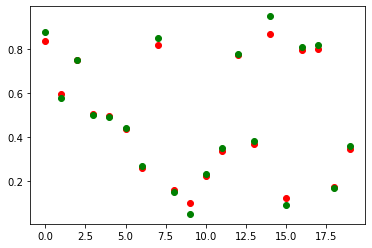

In [62]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

In [63]:
history.history

{'loss': [0.7368806600570679,
  0.7332215309143066,
  0.7296088933944702,
  0.7260025143623352,
  0.7224282622337341,
  0.7188908457756042,
  0.715375542640686,
  0.7118940353393555,
  0.7084446549415588,
  0.7050157189369202,
  0.701610267162323,
  0.6982352137565613,
  0.6949198842048645,
  0.6916083097457886,
  0.6883253455162048,
  0.6850839853286743,
  0.6818981170654297,
  0.6786679625511169,
  0.6755239367485046,
  0.6723837852478027,
  0.6692876815795898,
  0.6661984324455261,
  0.6631749868392944,
  0.6601148843765259,
  0.6571345329284668,
  0.654157817363739,
  0.6512078046798706,
  0.6482948064804077,
  0.6454225182533264,
  0.642524778842926,
  0.6396952867507935,
  0.6368881464004517,
  0.6340700387954712,
  0.6313080787658691,
  0.6285374760627747,
  0.62579745054245,
  0.6230894327163696,
  0.6204200387001038,
  0.6177739500999451,
  0.6151943206787109,
  0.6125974655151367,
  0.6100451946258545,
  0.6074932813644409,
  0.6049732565879822,
  0.6024618744850159,
  0.6000

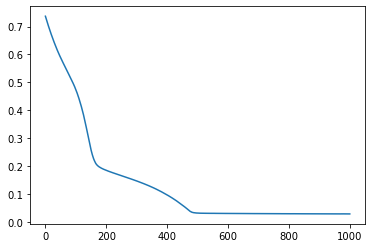

In [64]:
plt.plot(history.history['loss'])
plt.show()

# Stacking LSTMS
## You can put another LSTM after the first LSTM
## Remember to put return_sequences=True so that the shape of first LSTM output is (None, 5, 1) instead of (1)
## Then it can be fed into second LSTM with the same shape, no issues and second LSTM return_sequences=False
## It will allow output to go back to (None, 1)

In [65]:
model2 = Sequential()
model2.add(LSTM((1), batch_input_shape=(None, 5, 1), return_sequences=True))
model2.add(LSTM((1), batch_input_shape=(None, 5, 1), return_sequences=False))
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [66]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_8 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [67]:
history2 = model2.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
results2 = model2.predict(x_test)

Epoch 1/1000
3/3 [==============================] - 1s 384ms/step - loss: 0.5008 - accuracy: 0.0000e+00 - val_loss: 0.4418 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4974 - accuracy: 0.0000e+00 - val_loss: 0.4385 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4941 - accuracy: 0.0000e+00 - val_loss: 0.4352 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4906 - accuracy: 0.0000e+00 - val_loss: 0.4318 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.4872 - accuracy: 0.0000e+00 - val_loss: 0.4283 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4836 - accuracy: 0.0000e+00 - val_loss: 0.4249 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.4801 - accuracy: 0.0000e+00 - 

Epoch 56/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.2840 - accuracy: 0.0000e+00 - val_loss: 0.2416 - val_accuracy: 0.0000e+00
Epoch 57/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.2812 - accuracy: 0.0000e+00 - val_loss: 0.2395 - val_accuracy: 0.0000e+00
Epoch 58/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2788 - accuracy: 0.0000e+00 - val_loss: 0.2376 - val_accuracy: 0.0000e+00
Epoch 59/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.2761 - accuracy: 0.0000e+00 - val_loss: 0.2356 - val_accuracy: 0.0000e+00
Epoch 60/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2736 - accuracy: 0.0000e+00 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 61/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.2712 - accuracy: 0.0000e+00 - val_loss: 0.2319 - val_accuracy: 0.0000e+00
Epoch 62/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.2688 - accuracy: 0.0000e

Epoch 111/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1868 - accuracy: 0.0125 - val_loss: 0.1602 - val_accuracy: 0.0000e+00
Epoch 112/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.1850 - accuracy: 0.0125 - val_loss: 0.1584 - val_accuracy: 0.0000e+00
Epoch 113/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.1832 - accuracy: 0.0125 - val_loss: 0.1567 - val_accuracy: 0.0000e+00
Epoch 114/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.1814 - accuracy: 0.0125 - val_loss: 0.1549 - val_accuracy: 0.0000e+00
Epoch 115/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.1796 - accuracy: 0.0125 - val_loss: 0.1530 - val_accuracy: 0.0000e+00
Epoch 116/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.1777 - accuracy: 0.0125 - val_loss: 0.1512 - val_accuracy: 0.0000e+00
Epoch 117/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1758 - accuracy: 0.0125 - val_loss: 0.149

Epoch 167/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0936 - accuracy: 0.0125 - val_loss: 0.0768 - val_accuracy: 0.0000e+00
Epoch 168/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0928 - accuracy: 0.0125 - val_loss: 0.0763 - val_accuracy: 0.0000e+00
Epoch 169/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0921 - accuracy: 0.0125 - val_loss: 0.0759 - val_accuracy: 0.0000e+00
Epoch 170/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0915 - accuracy: 0.0125 - val_loss: 0.0755 - val_accuracy: 0.0000e+00
Epoch 171/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0907 - accuracy: 0.0125 - val_loss: 0.0750 - val_accuracy: 0.0000e+00
Epoch 172/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0900 - accuracy: 0.0125 - val_loss: 0.0745 - val_accuracy: 0.0000e+00
Epoch 173/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0894 - accuracy: 0.0125 - val_loss: 0.074

Epoch 223/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0670 - accuracy: 0.0125 - val_loss: 0.0535 - val_accuracy: 0.0000e+00
Epoch 224/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0667 - accuracy: 0.0125 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 225/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0663 - accuracy: 0.0125 - val_loss: 0.0527 - val_accuracy: 0.0000e+00
Epoch 226/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0660 - accuracy: 0.0125 - val_loss: 0.0523 - val_accuracy: 0.0000e+00
Epoch 227/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0657 - accuracy: 0.0125 - val_loss: 0.0520 - val_accuracy: 0.0000e+00
Epoch 228/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0655 - accuracy: 0.0125 - val_loss: 0.0517 - val_accuracy: 0.0000e+00
Epoch 229/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0652 - accuracy: 0.0125 - val_loss: 0.051

3/3 [==============================] - 0s 12ms/step - loss: 0.0542 - accuracy: 0.0125 - val_loss: 0.0419 - val_accuracy: 0.0000e+00
Epoch 279/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0541 - accuracy: 0.0125 - val_loss: 0.0418 - val_accuracy: 0.0000e+00
Epoch 280/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0540 - accuracy: 0.0125 - val_loss: 0.0416 - val_accuracy: 0.0000e+00
Epoch 281/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0538 - accuracy: 0.0125 - val_loss: 0.0415 - val_accuracy: 0.0000e+00
Epoch 282/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0537 - accuracy: 0.0125 - val_loss: 0.0415 - val_accuracy: 0.0000e+00
Epoch 283/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0535 - accuracy: 0.0125 - val_loss: 0.0414 - val_accuracy: 0.0000e+00
Epoch 284/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0534 - accuracy: 0.0125 - val_loss: 0.0413 - val_accurac

3/3 [==============================] - 0s 12ms/step - loss: 0.0475 - accuracy: 0.0125 - val_loss: 0.0362 - val_accuracy: 0.0000e+00
Epoch 334/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0473 - accuracy: 0.0125 - val_loss: 0.0361 - val_accuracy: 0.0000e+00
Epoch 335/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0472 - accuracy: 0.0125 - val_loss: 0.0359 - val_accuracy: 0.0000e+00
Epoch 336/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0472 - accuracy: 0.0125 - val_loss: 0.0358 - val_accuracy: 0.0000e+00
Epoch 337/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0472 - accuracy: 0.0125 - val_loss: 0.0357 - val_accuracy: 0.0000e+00
Epoch 338/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0471 - accuracy: 0.0125 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 339/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0469 - accuracy: 0.0125 - val_loss: 0.0357 - val_accurac

Epoch 389/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0431 - accuracy: 0.0125 - val_loss: 0.0320 - val_accuracy: 0.0000e+00
Epoch 390/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0430 - accuracy: 0.0125 - val_loss: 0.0318 - val_accuracy: 0.0000e+00
Epoch 391/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0430 - accuracy: 0.0125 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 392/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0430 - accuracy: 0.0125 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 393/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0429 - accuracy: 0.0125 - val_loss: 0.0317 - val_accuracy: 0.0000e+00
Epoch 394/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0428 - accuracy: 0.0125 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 395/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0427 - accuracy: 0.0125 - val_loss: 0.031

Epoch 445/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0401 - accuracy: 0.0125 - val_loss: 0.0293 - val_accuracy: 0.0000e+00
Epoch 446/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0401 - accuracy: 0.0125 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 447/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0403 - accuracy: 0.0125 - val_loss: 0.0300 - val_accuracy: 0.0000e+00
Epoch 448/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0403 - accuracy: 0.0125 - val_loss: 0.0296 - val_accuracy: 0.0000e+00
Epoch 449/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0400 - accuracy: 0.0125 - val_loss: 0.0293 - val_accuracy: 0.0000e+00
Epoch 450/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0399 - accuracy: 0.0125 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 451/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0399 - accuracy: 0.0125 - val_loss: 0.028

Epoch 501/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.0125 - val_loss: 0.0269 - val_accuracy: 0.0000e+00
Epoch 502/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.0125 - val_loss: 0.0269 - val_accuracy: 0.0000e+00
Epoch 503/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.0125 - val_loss: 0.0268 - val_accuracy: 0.0000e+00
Epoch 504/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.0125 - val_loss: 0.0266 - val_accuracy: 0.0000e+00
Epoch 505/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.0125 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 506/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.0125 - val_loss: 0.0263 - val_accuracy: 0.0000e+00
Epoch 507/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.0125 - val_loss: 0.026

Epoch 557/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0362 - accuracy: 0.0125 - val_loss: 0.0253 - val_accuracy: 0.0000e+00
Epoch 558/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0362 - accuracy: 0.0125 - val_loss: 0.0254 - val_accuracy: 0.0000e+00
Epoch 559/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0361 - accuracy: 0.0125 - val_loss: 0.0253 - val_accuracy: 0.0000e+00
Epoch 560/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0361 - accuracy: 0.0125 - val_loss: 0.0251 - val_accuracy: 0.0000e+00
Epoch 561/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0360 - accuracy: 0.0125 - val_loss: 0.0251 - val_accuracy: 0.0000e+00
Epoch 562/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0362 - accuracy: 0.0125 - val_loss: 0.0251 - val_accuracy: 0.0000e+00
Epoch 563/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0360 - accuracy: 0.0125 - val_loss: 0.025

Epoch 613/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.0125 - val_loss: 0.0242 - val_accuracy: 0.0000e+00
Epoch 614/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.0125 - val_loss: 0.0242 - val_accuracy: 0.0000e+00
Epoch 615/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.0125 - val_loss: 0.0239 - val_accuracy: 0.0000e+00
Epoch 616/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.0125 - val_loss: 0.0236 - val_accuracy: 0.0000e+00
Epoch 617/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.0125 - val_loss: 0.0233 - val_accuracy: 0.0000e+00
Epoch 618/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.0125 - val_loss: 0.0233 - val_accuracy: 0.0000e+00
Epoch 619/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.0125 - val_loss: 0.023

Epoch 669/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.0125 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 670/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.0125 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 671/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.0125 - val_loss: 0.0232 - val_accuracy: 0.0000e+00
Epoch 672/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.0125 - val_loss: 0.0232 - val_accuracy: 0.0000e+00
Epoch 673/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0335 - accuracy: 0.0125 - val_loss: 0.0232 - val_accuracy: 0.0000e+00
Epoch 674/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0334 - accuracy: 0.0125 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 675/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0335 - accuracy: 0.0125 - val_loss: 0.022

Epoch 725/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0326 - accuracy: 0.0125 - val_loss: 0.0224 - val_accuracy: 0.0000e+00
Epoch 726/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0125 - val_loss: 0.0224 - val_accuracy: 0.0000e+00
Epoch 727/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0125 - val_loss: 0.0224 - val_accuracy: 0.0000e+00
Epoch 728/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0125 - val_loss: 0.0223 - val_accuracy: 0.0000e+00
Epoch 729/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0125 - val_loss: 0.0223 - val_accuracy: 0.0000e+00
Epoch 730/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0125 - val_loss: 0.0224 - val_accuracy: 0.0000e+00
Epoch 731/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0125 - val_loss: 0.022

Epoch 781/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0317 - accuracy: 0.0125 - val_loss: 0.0214 - val_accuracy: 0.0000e+00
Epoch 782/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0317 - accuracy: 0.0125 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 783/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0317 - accuracy: 0.0125 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 784/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0316 - accuracy: 0.0125 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 785/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0317 - accuracy: 0.0125 - val_loss: 0.0219 - val_accuracy: 0.0000e+00
Epoch 786/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0316 - accuracy: 0.0125 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 787/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0316 - accuracy: 0.0125 - val_loss: 0.021

Epoch 837/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0309 - accuracy: 0.0125 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 838/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0309 - accuracy: 0.0125 - val_loss: 0.0211 - val_accuracy: 0.0000e+00
Epoch 839/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0310 - accuracy: 0.0125 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 840/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0311 - accuracy: 0.0125 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 841/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0310 - accuracy: 0.0125 - val_loss: 0.0209 - val_accuracy: 0.0000e+00
Epoch 842/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0309 - accuracy: 0.0125 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 843/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0309 - accuracy: 0.0125 - val_loss: 0.021

Epoch 893/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 894/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 895/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 896/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0305 - accuracy: 0.0125 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 897/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0303 - accuracy: 0.0125 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 898/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0304 - accuracy: 0.0125 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 899/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0302 - accuracy: 0.0125 - val_loss: 0.020

Epoch 949/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 950/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 951/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 952/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 953/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0296 - accuracy: 0.0125 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 954/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 955/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0297 - accuracy: 0.0125 - val_loss: 0.019

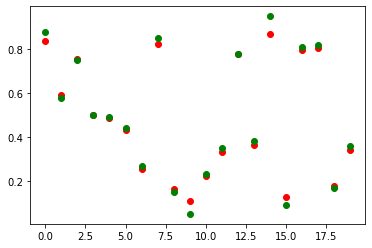

In [68]:
plt.scatter(range(20), results2, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

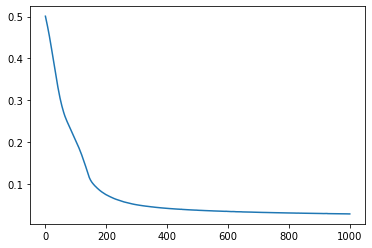

In [69]:
plt.plot(history2.history['loss'])
plt.show()

# How to do variable size inputs to train RNN/LSTN
## Pad sequence with 0 (prepend or append 0s to get same size)
## Might not be best solution

# Alternative method: Set batch input shape to be (None, None, 1)
## Then train model in order of columns of input
## e.g. Train by (None, 1, 1) rows, then (None, 2, 1) rows, (None, 3, 1) rows
## Cycle through each of them and repeat through a loop

In [113]:
def prepare_data(input_size, rows):
    data = [[[(i+j)/rows] for i in range(input_size)] for j in range(rows)]
    target = [(i+input_size)/rows for i in range(rows)]
    
    data = np.array(data, dtype=float)
    target = np.array(target, dtype=float)
    print(f"Data shape: {data.shape}, Target shape: {target.shape}")
    return data, target


def prepare_model1(input_size):
    model = Sequential()
    model.add(LSTM((1), batch_input_shape=(None, input_size, 1), return_sequences=False))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
    return model

def prepare_model_variableinput():
    model = Sequential()
    model.add(LSTM((1), batch_input_shape=(None, None, 1), return_sequences=False))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
    return model


def plot_results(results, y_test, history, rows):
    plt.rcParams['figure.figsize'] = [16, 6]
    fig, axs = plt.subplots(1, 2)
    axs[0].scatter(range(results.shape[0]), results, c='r')
    axs[0].scatter(range(y_test.shape[0]), y_test, c='g')
    axs[1].plot(history.history['loss'])
    plt.show()


def run_model(input_size, rows, train_iterations):
    data, target = prepare_data(input_size, rows)
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
    model = prepare_model1(input_size)
    history = model.fit(x_train, y_train, epochs=train_iterations, validation_data=(x_test, y_test), verbose=0)
    results = model.predict(x_test)
    plot_results(results, y_test, history)
    

def run_model_iterate(input_size_min, input_size_max, rows, train_iterations):
    model = prepare_model_variableinput()
    for i in range(input_size_min, input_size_max+1):
        data, target = prepare_data(i, rows)
        x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
        history = model.fit(x_train, y_train, epochs=train_iterations, validation_data=(x_test, y_test), verbose=0)
        results = model.predict(x_test)
        plot_results(results, y_test, history, rows)
        

Data shape: (100, 5, 1), Target shape: (100,)


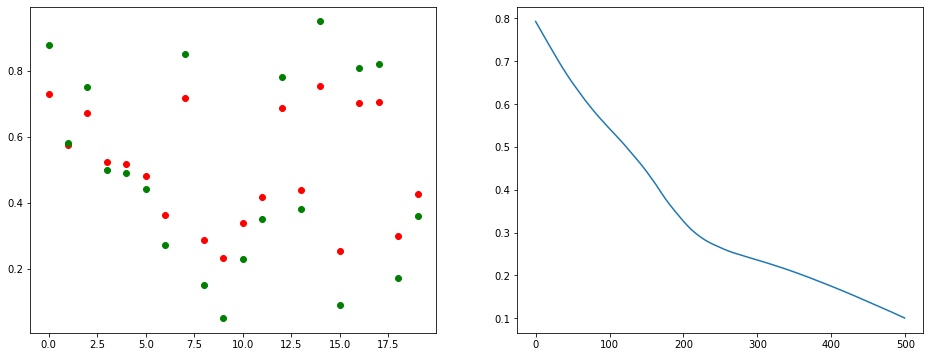

In [98]:
run_model(5, 100, 500)

# Loop function to train model across different shapes of data

Data shape: (200, 5, 1), Target shape: (200,)


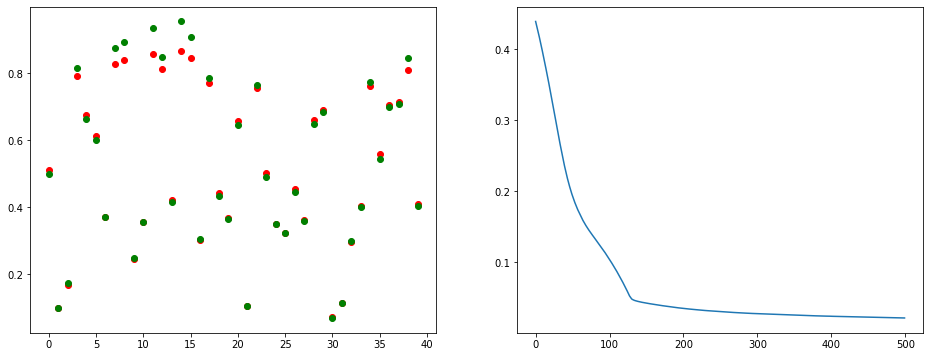

Data shape: (200, 6, 1), Target shape: (200,)


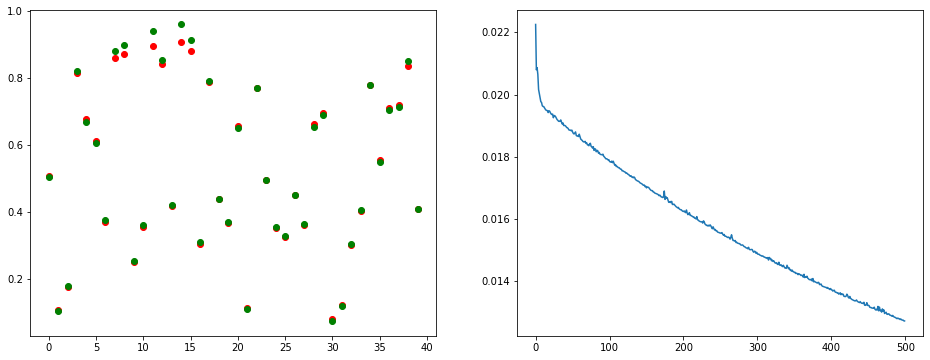

Data shape: (200, 7, 1), Target shape: (200,)


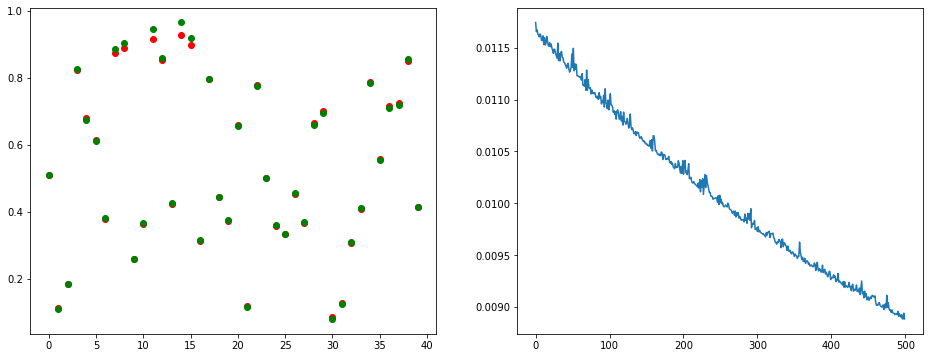

Data shape: (200, 8, 1), Target shape: (200,)


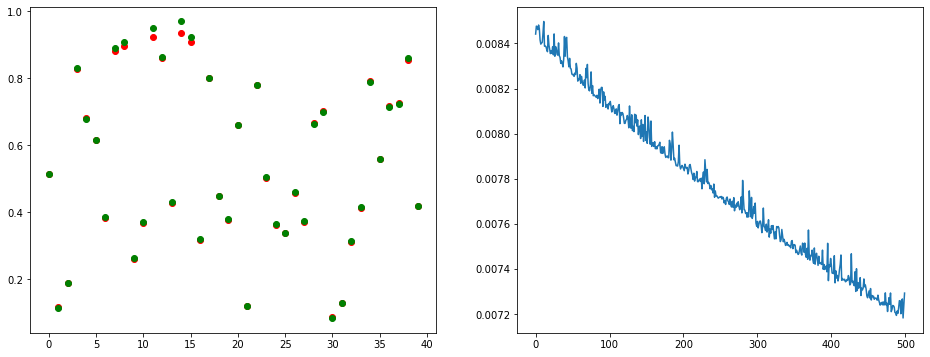

Data shape: (200, 9, 1), Target shape: (200,)


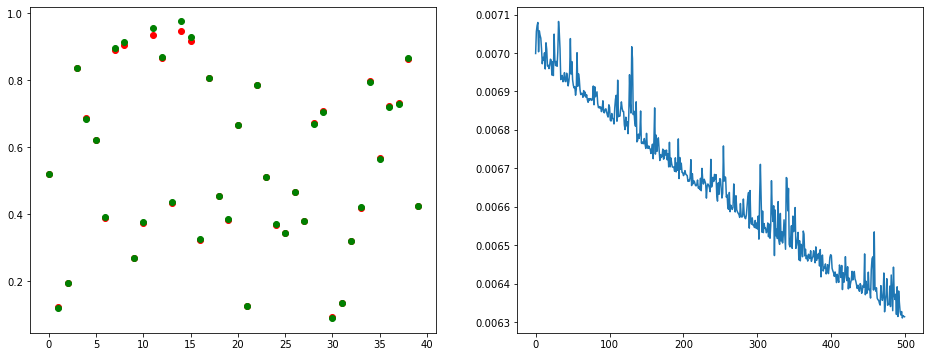

Data shape: (200, 10, 1), Target shape: (200,)


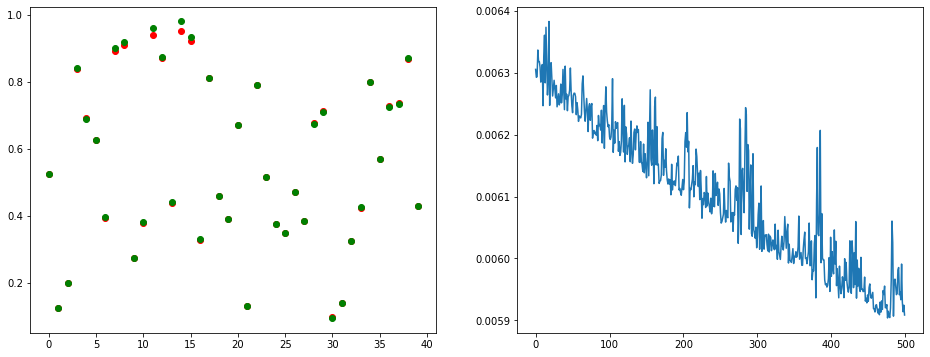

In [114]:
run_model_iterate(5, 10, 200, 500)